## Gender indicators in from world data
#### This notebook analyzes gender indicators from world data
- Investigate if correlations exist between gender indicators
- Benchmark Singapore’s performance against countries with similar economic, ideological or cultural profile
- Trends in indicators such as gender parity in labour force participation and tertiary education attainment


#### Data sets:
1) Gender Statistics
URL: [https://datacatalog.worldbank.org/dataset/gender-statistics](https://datacatalog.worldbank.org/dataset/gender-statistics) 
    
2) Current Classification by Income in XLS format
URL: [https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups](https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups) 



In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap
import os

%matplotlib inline

In [2]:
# read data
file1 = "data/Gender_StatsEXCEL.xlsx"
file2 = "data/CLASS.xls"  #this file maps countries to geographical regions and facilitates comparison in plots
data1 = pd.read_excel(file1, sheet_name=0)
data2 = pd.read_excel(file2, sheet_name=0, skiprows=4, usecols = [2,5,6])

#### Data exploration and manipulation

In [3]:
print(data1.info())
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132815 entries, 0 to 132814
Data columns (total 62 columns):
Country Name      132815 non-null object
Country Code      132815 non-null object
Indicator Name    132815 non-null object
Indicator Code    132815 non-null object
1960              7505 non-null float64
1961              7322 non-null float64
1962              7994 non-null float64
1963              7386 non-null float64
1964              7332 non-null float64
1965              7365 non-null float64
1966              7547 non-null float64
1967              8041 non-null float64
1968              7441 non-null float64
1969              7486 non-null float64
1970              10081 non-null float64
1971              11299 non-null float64
1972              11633 non-null float64
1973              11034 non-null float64
1974              11054 non-null float64
1975              12185 non-null float64
1976              12458 non-null float64
1977              12979 non-null float

In [4]:
data1.isnull().sum()/len(data1) #show percentage of null values for each year in data1

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
1960              0.943493
1961              0.944871
1962              0.939811
1963              0.944389
1964              0.944795
1965              0.944547
1966              0.943177
1967              0.939457
1968              0.943975
1969              0.943636
1970              0.924097
1971              0.914927
1972              0.912412
1973              0.916922
1974              0.916771
1975              0.908256
1976              0.906200
1977              0.902278
1978              0.906012
1979              0.904484
1980              0.891202
1981              0.897956
1982              0.896201
1983              0.899093
1984              0.898543
1985              0.890088
                    ...   
1988              0.895893
1989              0.894470
1990              0.845680
1991              0.814208
1992              0.810413
1993              0.814953
1

In [5]:
data1.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Arab World,ARB,"Access to anti-retroviral drugs, female (%)",SH.HIV.ARTC.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.379121,8.981335,10.809919,12.393742,14.735615,17.476939,20.271829,23.921017,27.819662,NaN
1,Arab World,ARB,"Access to anti-retroviral drugs, male (%)",SH.HIV.ARTC.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.173559,10.474621,12.097192,13.687142,14.886223,17.240057,19.489992,22.092107,26.609062,NaN
2,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.775815,NaN,NaN,22.079350,NaN,NaN,25.635403
3,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.377668,NaN,NaN,37.790764,NaN,NaN,48.328518
4,Arab World,ARB,"Adjusted net enrollment rate, primary, female ...",SE.PRM.TENR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,82.114799,82.397430,83.632736,83.027420,83.984322,82.891869,82.462196,82.840759,82.925117,NaN


In [6]:
data2

,Economy,Region,Income group
0,x,x,x
1,Afghanistan,South Asia,Low income
2,Albania,Europe & Central Asia,Upper middle income
3,Algeria,Middle East & North Africa,Upper middle income
4,American Samoa,East Asia & Pacific,Upper middle income
5,Andorra,Europe & Central Asia,High income
6,Angola,Sub-Saharan Africa,Lower middle income
7,Antigua and Barbuda,Latin America & Caribbean,High income
8,Argentina,Latin America & Caribbean,High income
9,Armenia,Europe & Central Asia,Upper middle income


In [7]:
data2.dropna(axis=0, inplace=True) #extract only rows that contain country-region pairs for mapping with data1 
data2=data2.iloc[1:] #drop blank first row

In [8]:
countries = data2['Economy'].unique()
regions= data2['Region'].unique()
incomes = data2['Income group'].unique()
indicators = data1['Indicator Name'].unique()

print("In the data set, there are {} countries, {} regions and {} income types".format(len(countries),len(regions),len(incomes)))
print("There are {} indicators".format(len(indicators)))

In the data set, there are 218 countries, 7 regions and 4 income types
There are 505 indicators


In [9]:
data1['Country Name'].unique() 

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & Caribbean (IDA & IBRD)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)

#### Data1 contains not only statistics for individual countries but clusters of countries such as geographical regions and income levels too.  2 subsets will be created from data1:
- Set containing only country data (to address Aims 1-2 mentioned at the start of this notebook)
- Set containing cluster data pertaining to regions, income categories and "World" (aggregated over all countries) (to address Aim 3 mentioned at the start of this notebook)

In [10]:
#define function to create subsets of data of interest from data1 
def subset_data(data, subset_group, start, end):

    # subset data to include only subset group
    df = data[data['Country Name'].isin(subset_group)]

    #subset data to include only specified time frame
    years_to_keep = [str(year) for year in list(range(start,end+1))]
    cols_to_keep = ['Country Name','Indicator Name'] + years_to_keep
    df = df[cols_to_keep]


    # select indicators of interest, based on indicators explored in SG plots and indicators of interest
    selected_indicators = ['GNI per capita, Atlas method (current US$)',
    'Expected years of schooling, female',
    'Expected years of schooling, male',
    'Tertiary education, academic staff (% female)',
    'Educational attainment, at least completed short-cycle tertiary, population 25+, female (%) (cumulative)',
    'Educational attainment, at least completed short-cycle tertiary, population 25+, male (%) (cumulative)',
    'Literacy rate, adult female (% of females ages 15 and above)',
    'Literacy rate, adult male (% of males ages 15 and above)',
    'School enrollment, tertiary (gross), gender parity index (GPI)',
    'Proportion of women subjected to physical and/or sexual violence in the last 12 months (% of women age 15-49)',
    'Female professional and technical workers (% of total)',
    'Proportion of seats held by women in national parliaments (%)',
    'Proportion of women in ministerial level positions (%)',
    'Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)',
    'Female headed households (% of households with a female head)',
    'Women who were first married by age 18 (% of women ages 20-24)',
    'Adolescent fertility rate (births per 1,000 women ages 15-19)',
    'Fertility rate, total (births per woman)',
    'Maternal leave benefits (% of wages paid)',
    'Maternity leave (days paid)',
    'Firms with female participation in ownership (% of firms)',
    'Firms with female top manager (% of firms)',
    'Female share of employment in senior and middle management (%)',
    'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)',
    'Unemployment, female (% of female labor force) (modeled ILO estimate)',
    'Unemployment, male (% of male labor force) (modeled ILO estimate)']

    #subset data based on selected indicators
    df = df[df['Indicator Name'].isin(selected_indicators)] 

    #get column names corresponding to years 
    years = [str(x) for x in range(start,end+1)]

    # reshape df into df1: get indicators as column headers and years as observations. Exclude redundant columns such as country code and indicator code
    df1 = pd.melt(df, id_vars=['Country Name','Indicator Name'], value_vars = years, 
            var_name='Year', value_name='Value')
    df1 = df1.set_index(['Country Name','Year','Indicator Name']).unstack(level=-1)
    df1.reset_index(inplace=True)
    df1.columns = df1.columns.droplevel(0) #get rid of multi-index label
    df1.columns = ['Country', 'Year']+(list(df1.columns[2:])) #rename columns

    # create new variables for gender comparison - calculate the parity index / rename indicator names for consistency / convert all parity index to %
    df1['Ratio of female to male tertiary educational attainment rate (GPI) (%)'] = 100*df1['Educational attainment, at least completed short-cycle tertiary, population 25+, female (%) (cumulative)']/df1['Educational attainment, at least completed short-cycle tertiary, population 25+, male (%) (cumulative)']
    df1['Ratio of female to male expected years of schooling (%)'] = 100*df1['Expected years of schooling, female']/df1['Expected years of schooling, male']
    df1['Literacy rate (ages 15 and above) (GPI)(%)'] = 100*df1['Literacy rate, adult female (% of females ages 15 and above)']/df1['Literacy rate, adult male (% of males ages 15 and above)']
    df1.rename(columns={'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)':
                   'Labor force participation rate (ages 15 and above) (%) (GPI)'})
    df1['Ratio of female to male unemployment (%)'] = 100*df1['Unemployment, female (% of female labor force) (modeled ILO estimate)']/df1['Unemployment, male (% of male labor force) (modeled ILO estimate)']
    df1['School enrollment, tertiary (gross), gender parity index (GPI)(%)'] = 100 * df1['School enrollment, tertiary (gross), gender parity index (GPI)'] #data given as a ratio, convert to % for consistency
    
    #drop redundant columns
    columns_to_drop = ['Expected years of schooling, female', 
                   'Expected years of schooling, male',
                   'Educational attainment, at least completed short-cycle tertiary, population 25+, female (%) (cumulative)',
                   'Educational attainment, at least completed short-cycle tertiary, population 25+, male (%) (cumulative)',
                   'Literacy rate, adult female (% of females ages 15 and above)',
                   'Literacy rate, adult male (% of males ages 15 and above)',
                   'Unemployment, female (% of female labor force) (modeled ILO estimate)',
                   'Unemployment, male (% of male labor force) (modeled ILO estimate)',
                        'School enrollment, tertiary (gross), gender parity index (GPI)']

    df1.drop(columns_to_drop, axis = 1, inplace=True)

    #shorten column names
    df1.columns = ['Country', 'Year',
    'Adolescent fertility rate (per 1,000)',
    'Proportion of households with female head (%)',
    'Professional and technical workers (% female)',
    'Employment in senior and middle management (% female)',
    'Fertility rate',
    'Firms with female participation in ownership (% of firms)',
    'Firms with female top manager (% of firms)',
    'GNI per capita(current US$)',
    'Maternity leave (days paid)',
    'National parliament seats (% female)',
    'Ministerial level positions (% female)',
    'Proportion of women subjected to physical/sexual violence in last 12 months (%)',
    'Labor force participation rate (GPI) (%)',
    'Tertiary education, academic staff (% female)',
    'Proportion of women participating in the three decisions (%)',
    'Women who were first married by age 18 (% of women ages 20-24)',
    'Ratio of female to male tertiary educational attainment rate (GPI) (%)',
    'Ratio of female to male expected years of schooling (%)',
    'Literacy rate (ages 15 and above) (GPI)(%)',
    'Ratio of female to male unemployment (%)',
    'School enrollment, tertiary (gross),(GPI) (%)']
    
    #set year column to numeric and take log of GNI for comparability to other data as GNI values are of magnitudes larger than other indicators
    df1['Year']=pd.to_numeric(df1['Year'])
    df1['log(GNI)'] = df1['GNI per capita(current US$)'].apply(lambda x: math.log(x)) 

    return df1

In [11]:
#define function to drop columns if the number of NaN values for that column exceed a threshold (i.e. too many NaN values, not useful for plots) 
def dropcols(data, threshold):

    columns_to_drop = data.columns[(data.isnull().sum()/len(data)) > threshold]

    return data.drop(columns_to_drop, axis=1)

#### For country data, subset data 1 by specifying short/conservative 5 year time-frame.

As there were many NaN values in the data set, forward fill will be used. The assumption is that values for any indicator will not change drastically for any country from one year to the next, which makes forward fill a valid choice. 

By keeping to a short time frame of 5 years, we also avoid the scenario where there are NAs for many consecutive years and values get propagated from many years ago to the current year (which would be very inaccurate). 

Furthermore, the country data will be used to compare countries and relationships between indicators, rather than trends over the years.

In [12]:
# get country gender data (Subset1)
start = 2012
end = 2017
country_data = subset_data(data1,countries,start,end)

#map countries to geographical region (to facilitate scatterplot analysis), drop redundant columns
country_data = country_data.merge(data2[['Economy','Region']], how='left', left_on = 'Country', right_on = "Economy")
country_data.drop('Economy', inplace=True, axis=1) 

In [13]:
country_data.isnull().sum()/len(country_data)

Country                                                                            0.000000
Year                                                                               0.000000
Adolescent fertility rate (per 1,000)                                              0.256231
Proportion of households with female head (%)                                      0.950935
Professional and technical workers (% female)                                      1.000000
Employment in senior and middle management (% female)                              0.774143
Fertility rate                                                                     0.230530
Firms with female participation in ownership (% of firms)                          0.923676
Firms with female top manager (% of firms)                                         0.923676
GNI per capita(current US$)                                                        0.128505
Maternity leave (days paid)                                                     

In [14]:
#fill NA values and sort by region (so the legend in plot is alphabetical)
#define new dataframe country_data_m for filled table
country_data_m = country_data.groupby('Country').apply(lambda x:x.fillna(method='pad')) 
country_data_m.sort_values(by='Region', inplace=True)

# Drop indicators for which there are still many NaNs despite forward filling. 
# Indicators with more than 50% NaN values are dropped as they will be less useful for scatterplots
threshold = 0.5
country_data_m = dropcols(country_data_m, threshold)
print(country_data_m.columns)

Index(['Country', 'Year', 'Adolescent fertility rate (per 1,000)',
       'Fertility rate', 'GNI per capita(current US$)',
       'Maternity leave (days paid)', 'National parliament seats (% female)',
       'Ministerial level positions (% female)',
       'Labor force participation rate (GPI) (%)',
       'Tertiary education, academic staff (% female)',
       'Ratio of female to male expected years of schooling (%)',
       'Ratio of female to male unemployment (%)',
       'School enrollment, tertiary (gross),(GPI) (%)', 'log(GNI)', 'Region'],
      dtype='object')


In [15]:
country_data_m.head()

,Country,Year,"Adolescent fertility rate (per 1,000)",Fertility rate,GNI per capita(current US$),Maternity leave (days paid),National parliament seats (% female),Ministerial level positions (% female),Labor force participation rate (GPI) (%),"Tertiary education, academic staff (% female)",Ratio of female to male expected years of schooling (%),Ratio of female to male unemployment (%),"School enrollment, tertiary (gross),(GPI) (%)",log(GNI),Region
965,Samoa,2017,24.7590,3.976,4100.0,28.0,10.0,15.4,61.085671,NaN,NaN,134.467619,NaN,8.318742,East Asia & Pacific
168,Brunei Darussalam,2012,13.6150,1.874,42290.0,NaN,NaN,0.0,77.331739,46.121300,104.492633,131.376254,175.362003,10.652306,East Asia & Pacific
169,Brunei Darussalam,2013,12.9464,1.884,45180.0,NaN,NaN,0.0,78.120798,46.626690,105.637483,131.566775,182.537997,10.718410,East Asia & Pacific
170,Brunei Darussalam,2014,12.2778,1.888,42930.0,NaN,NaN,0.0,78.930466,47.389561,105.392693,131.753784,168.778002,10.667326,East Asia & Pacific
171,Brunei Darussalam,2015,11.6092,1.884,38590.0,91.0,NaN,0.0,78.925824,46.929821,104.988984,131.689905,164.513004,10.560748,East Asia & Pacific


#### For cluster data, subset data1 by years spanning 2001 - 2017 

As we are looking at trends over the years, we set a range similar to that used for the Singapore data set. 

As the time frame is wider, and we're looking at yearly trends, it's not appropriate to fill NaN values. Instead, the indicators with a high percentage of NaN values will be dropped.

In [16]:
#define subset_group containing clusters of interest
regions_incomes = np.append(regions, incomes)
regions_incomes = np.append(regions_incomes, "World")

#get cluster data
start = 2001
end = 2017
cluster_data = subset_data(data1, regions_incomes, start, end)


In [17]:
cluster_data.isnull().sum()/len(cluster_data)

Country                                                                            0.000000
Year                                                                               0.000000
Adolescent fertility rate (per 1,000)                                              0.058824
Proportion of households with female head (%)                                      1.000000
Professional and technical workers (% female)                                      1.000000
Employment in senior and middle management (% female)                              1.000000
Fertility rate                                                                     0.058824
Firms with female participation in ownership (% of firms)                          0.946078
Firms with female top manager (% of firms)                                         0.946078
GNI per capita(current US$)                                                        0.000000
Maternity leave (days paid)                                                     

In [18]:
#drop indicators with more than 60% NaN values
threshold = 0.2
cluster_data = dropcols(cluster_data, threshold)


In [19]:
print(list(cluster_data.columns))

['Country', 'Year', 'Adolescent fertility rate (per 1,000)', 'Fertility rate', 'GNI per capita(current US$)', 'National parliament seats (% female)', 'Labor force participation rate (GPI) (%)', 'Tertiary education, academic staff (% female)', 'Ratio of female to male expected years of schooling (%)', 'Ratio of female to male unemployment (%)', 'School enrollment, tertiary (gross),(GPI) (%)', 'log(GNI)']


In [20]:
cluster_data.describe()

,Year,"Adolescent fertility rate (per 1,000)",Fertility rate,GNI per capita(current US$),National parliament seats (% female),Labor force participation rate (GPI) (%),"Tertiary education, academic staff (% female)",Ratio of female to male expected years of schooling (%),Ratio of female to male unemployment (%),"School enrollment, tertiary (gross),(GPI) (%)",log(GNI)
count,204.000000,192.000000,192.000000,204.000000,204.000000,204.000000,187.000000,189.000000,204.000000,192.000000,204.000000
mean,2009.000000,50.715842,2.754282,11953.853325,18.391813,66.971302,37.164963,97.436362,124.032905,100.943125,8.504925
std,4.911031,31.597955,1.227574,15069.552829,4.741923,17.609127,8.309924,8.023391,32.799738,25.584790,1.456570
min,2001.000000,15.799034,1.541944,272.089149,4.329201,26.478937,16.530540,77.554492,77.756429,42.051000,5.606130
25%,2005.000000,24.429584,1.804994,1484.342903,16.085981,58.070807,35.058205,92.086560,99.171143,83.504250,7.302656
50%,2009.000000,39.519600,2.455906,6110.708639,18.705618,74.834692,39.852060,99.469728,116.520900,105.360500,8.717777
75%,2013.000000,65.240968,3.013797,11204.155297,21.797865,79.789000,42.889660,103.257951,135.576088,121.021750,9.323188
max,2017.000000,127.150684,5.732850,56721.934862,29.284986,86.318206,48.403630,110.277017,229.091197,141.244000,10.945916


#### Plots

#### Heatmap for country data

In [21]:
# define function to plot heatmap for pairwise correlation of variables in country data
def plot_corr_matrix(mat):
   
    fig,ax = plt.subplots(figsize=(20,16))

    # set a mask to remove redundant pairs in heatmap
    mask = np.zeros_like(mat)
    mask[np.triu_indices_from(mask)] = True
 
    #cmap = sns.color_palette("RdBu_r")
    cmap = sns.diverging_palette(220, 20, n=7)
        
    #plot heatmap
    ax = sns.heatmap(mat , cmap=cmap, annot=True, annot_kws={"size": 14},fmt='.2f', mask=mask)
    
    #set aesthestics
    labels = ['\n'.join(wrap(label,20))for label in correlation_matrix.columns]
    ax.set_xticklabels(labels, fontsize=14)
    ax.set_yticklabels(labels, fontsize=14)  
    ax.figure.axes[-1].yaxis.label.set_size(20)
    ax.set_title("Correlation between indicators", fontsize = 24)
    
    filename = "generatedplots/heatmap.png"
    plt.savefig(filename, dpi=400, bbox_inches='tight')


In [22]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)
        

#create folder for saving plots
createFolder('./generatedplots/')

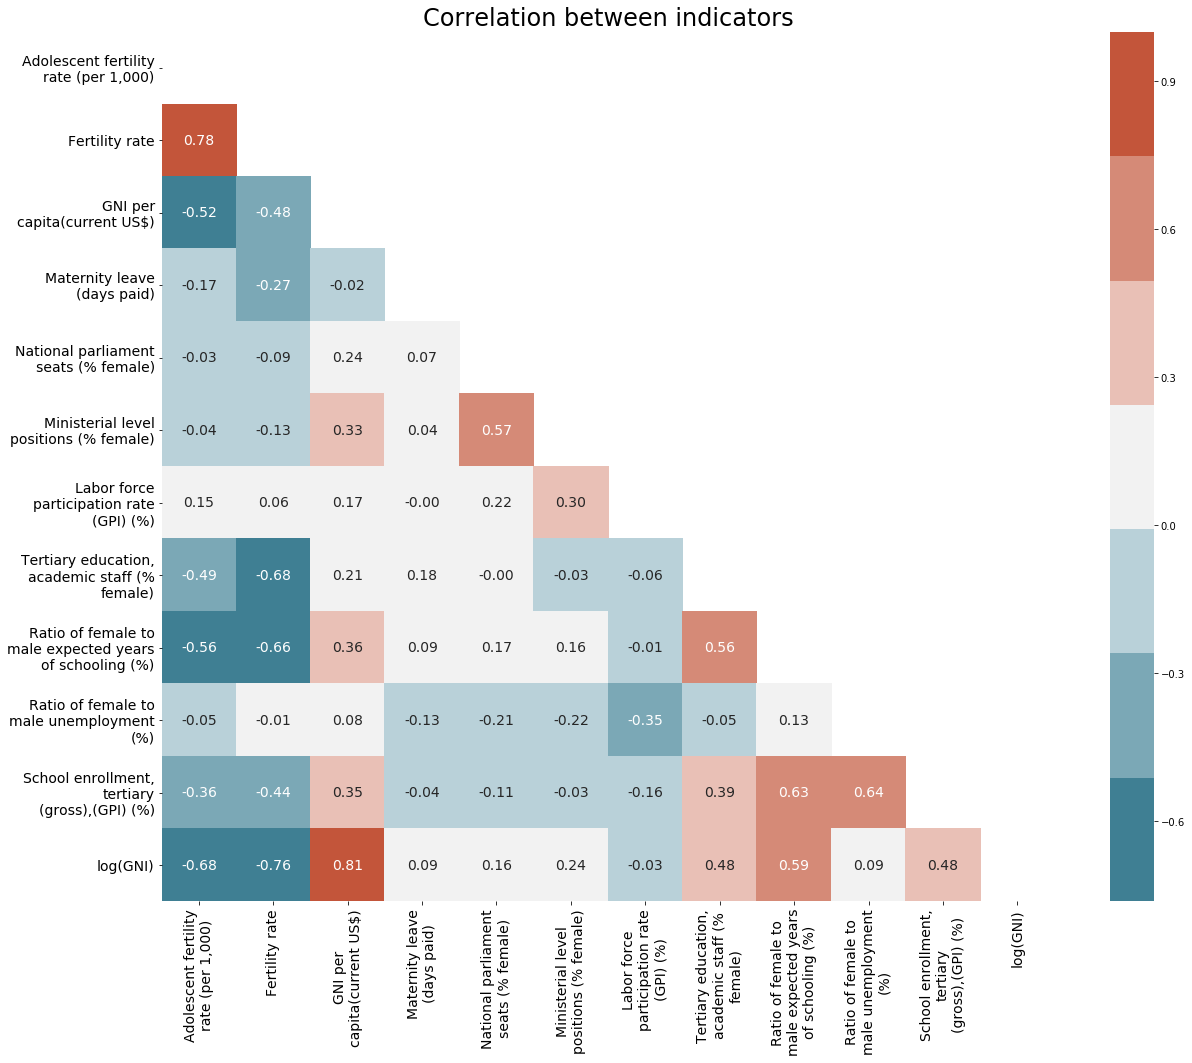

In [23]:
# get heatmap for quantitative variables
ref_year = 2017
correlation_matrix = country_data_m[country_data_m['Year']==ref_year].drop(['Country','Year','Region'],axis=1).corr()

plot_corr_matrix(correlation_matrix)

#### Interactive scatter plot for country data

In [24]:
from bokeh.plotting import figure
from bokeh.io import show, output_notebook, curdoc
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.layouts import row, WidgetBox
from bokeh.models.widgets import Slider, Select, CheckboxGroup, Tabs, Panel, Div
from bokeh.models import Range1d
from bokeh.models import Legend
from bokeh.models.glyphs import MultiLine
from bokeh.palettes import Dark2_8, Category20_12
output_notebook()

Loading BokehJS ...

In [25]:
print(country_data_m.columns)
print(len(country_data_m['Region'].unique()))

Index(['Country', 'Year', 'Adolescent fertility rate (per 1,000)',
       'Fertility rate', 'GNI per capita(current US$)',
       'Maternity leave (days paid)', 'National parliament seats (% female)',
       'Ministerial level positions (% female)',
       'Labor force participation rate (GPI) (%)',
       'Tertiary education, academic staff (% female)',
       'Ratio of female to male expected years of schooling (%)',
       'Ratio of female to male unemployment (%)',
       'School enrollment, tertiary (gross),(GPI) (%)', 'log(GNI)', 'Region'],
      dtype='object')
7


In [26]:
#define function to plot interactive scatterplot and update on user input
def scatter(doc): 
    
    df = country_data_m
    available_indicators = list(df.columns[2:-1])#exclude Country, Year, Region columns
    min_year = df['Year'].min()
    max_year = df['Year'].max()
      
    #create dataset based on inputs for plotting. x, y are selected indicators for plotting
    def create_dataset(data, x, y, year):
        
        source_list=[]
        color_palette = Dark2_8
        
        #set color dictionary mapping regions to colors
        colormap = {region:color_palette[i] for i,region in enumerate(data['Region'].unique())}
       
        #set colors for each row
        data['colors'] = [colormap[region] for region in data['Region']]
        data['line_colors'] = [colormap[region] for region in data['Region']]
        
        #use black line color for Singapore for visibility on plot
        data['line_colors'].loc[data['Country']=='Singapore'] = 'black'
        
        #subset data according to chosen year
        subset = data[data['Year']==year]
        
        #create list of data sources, each source corresponding to a different region. this allows creation of interactive legend
        for region in subset['Region'].unique(): 
            
            region_data = subset[subset['Region']==region]

            r_source = ColumnDataSource({
            'Country':region_data['Country'],
            'Region':region_data['Region'],
            'x':region_data[x],
            'y':region_data[y],
            'colors': region_data['colors'],
            'line_colors': region_data['line_colors'],
            'GNI': region_data['GNI per capita(current US$)']
            }
            )
            
            source_list.append(r_source)
       
        return source_list

    #create plot from dataset. sources for each region need to be explicitly specified for interactive legend. x, y are selected indicators for plotting
    def create_plot(s1,s2,s3,s4,s5,s6,s7,x,y,year):

        sources = [s1,s2,s3,s4,s5,s6,s7]
        
        #create plot figure
        p = figure(plot_width = 600, plot_height = 400, title = 'Gender indicators in {}'.format(year),
                   x_axis_label = x, y_axis_label = y, sizing_mode='scale_both',
                   toolbar_location="right")
        
        #set aesthetics
        p.title.text_font_size = '12pt'
        p.xaxis.axis_label_text_font_style = 'normal'
        p.yaxis.axis_label_text_font_style = 'normal'

        #loop over source list and plot glyphs for each region
        p1,p2,p3,p4,p5,p6,p7 = [p.circle('x', 'y', size = 4, fill_color = 'colors', 
                                          line_color = 'line_colors',
                                          fill_alpha = 0.8, source=source) for source in sources]

        #create manual legend (necessary to place legend outside plot)
        regions = [s.data['Region'].unique().item() for s in sources] #extract region from each source
        plots = [p1,p2,p3,p4,p5,p6,p7]
        legenditems = [(region, [plot]) for region,plot in zip(regions,plots)] 
        
        #set legend location and aesthetics
        legend = Legend(items=legenditems,location=(10,0))
        p.add_layout(legend,"right")
        p.legend.label_text_font_size = '8pt'  
        
        #set interactivity mode for legend i.e. click on region to toggle its data points
        p.legend.click_policy="hide"
        
        #add hovertool to show details for each data point
        hover = HoverTool(
            tooltips=[
                ("Country", "@Country"),
                ("Region", "@Region"),
                ("x:", "$x{0.1}"),
                ("y:", "$y{0.1}"),
                ("GNI per capita(US$)","@GNI")
            ]
        )

        p.add_tools(hover)
           
        return p

    #update function to update plots on change
    def update(attr, old, new):
        
        #get current values of inputs
        year = year_select.value
        x = x_select.value
        y = y_select.value
        
        #update sources
        new_src_list = create_dataset(df, x, y, year)
        s1.data,s2.data,s3.data,s4.data,s5.data,s6.data,s7.data = [new_src.data for new_src in new_src_list]
        
        #update labels and titles
        p.title.text = 'Gender indicators in {}'.format(year)
        p.xaxis.axis_label = x
        p.yaxis.axis_label = y
        
    #add a slider widget to select year. Initial year selected = max year
    year_select = Slider(start = min_year, end = max_year, step = 1, value = max_year, title = "Select Year")
    year_select.on_change('value', update)
    
    #add dropdown widgets to select indicators for y and x axes. Initial y and x: expected years of schooling (GPI) and fertility rate
    y_select = Select(title="Select indicator for y-axis", value=available_indicators[8], options=list(available_indicators))
    y_select.on_change('value',update)
    
    x_select = Select(title="Select indicator for x-axis", value=available_indicators[1], options=list(available_indicators))
    x_select.on_change('value',update)

    #set initial values to current widget values
    x = x_select.value
    y = y_select.value
    year = year_select.value
    
    #add a paragraph of explanatory text for user
    text = Div(text="""<font size="-2"><i>Click on legend to toggle data points on/off. <br />Data points for Singapore, where available, are outlined in black.</i></font>""")

    #get initial dataset and plot
    s1,s2,s3,s4,s5,s6,s7 = create_dataset(df, x, y, year)
    p = create_plot(s1,s2,s3,s4,s5,s6,s7, x, y, year)

    #layout widgets and plot
    controls = WidgetBox(year_select, y_select, x_select, text, width = 400, sizing_mode='scale_both')
    layout = row(controls, p)

    doc.add_root(layout)


In [27]:
show(scatter)

#### Interactive line charts for cluster data

In [28]:
print(cluster_data.columns)

Index(['Country', 'Year', 'Adolescent fertility rate (per 1,000)',
       'Fertility rate', 'GNI per capita(current US$)',
       'National parliament seats (% female)',
       'Labor force participation rate (GPI) (%)',
       'Tertiary education, academic staff (% female)',
       'Ratio of female to male expected years of schooling (%)',
       'Ratio of female to male unemployment (%)',
       'School enrollment, tertiary (gross),(GPI) (%)', 'log(GNI)'],
      dtype='object')


In [29]:
def trends(doc):
    df=cluster_data
    cluster_indicators = df.columns[2:-1] #exclude country, year and log(GNI)
    clusters = df['Country'].unique()
    
    #define function to create data set for plotting selected indicator and selected clusters
    def create_dataset(data, indicator, selected_clusters):

        color_palette = Category20_12
        
        #set color dictionary mapping regions to colors
        colormap = {cluster:color_palette[i] for i,cluster in enumerate(data['Country'].unique())}

        #subset data by selected clusters
        subset = data[data['Country'].isin(selected_clusters)]

        #create datasource for plotting points
        source_point = ColumnDataSource({
        'year':subset['Year'],
        'cluster':subset['Country'],
        'value':subset[indicator], #values for selected indicator
        'colors': [colormap[cluster] for cluster in subset['Country']]
         }
        )

        #create datasource for plotting lines. for multiple line plotting, data source has to be a list of lists, each list being data points for each cluster
        xs = []
        ys = []
        colors = []
        for cluster in subset['Country'].unique():
            df_cluster = subset[subset['Country']==cluster]
            xs.append(list(df_cluster['Year']))
            ys.append(list(df_cluster[indicator])) 
            colors.append(colormap[cluster])

        source_line = ColumnDataSource({
        'year':xs,
        'value':ys,
        'cluster':list(subset['Country'].unique()),
        'colors':colors}
        )
        return source_point,source_line

    #define function to plot interactive line charts. y is the selected indicator to be displayed
    def create_plot(source_pt, source_line, y):

        #create plot figure
        p = figure(plot_width = 600, plot_height = 400, title = y,
                   x_axis_label = 'Year', y_axis_label = y, sizing_mode = 'scale_both')

        #plot lines
        p.multi_line('year', 'value', line_width = 1, color = 'colors', source=source_line, 
                    legend = 'cluster')
        
        #plot points
        p.circle('year', 'value', size = 3, fill_color = 'white', line_color = 'colors',
                 source=source_pt)

        #set plot aesthetics
        p.legend.label_text_font_size = '6pt'
        p.x_range = Range1d(2001, 2030)
        p.xaxis.minor_tick_line_color = None
        p.xgrid.grid_line_color = None
        p.title.text_font_size = '12pt'
        p.xaxis.axis_label_text_font_style = 'normal'
        p.yaxis.axis_label_text_font_style = 'normal'
        
        #add hovertool to show details for each data point
        hover = HoverTool(
            tooltips=[
                ("Cluster: ", "@cluster"),
                ("Value:", "$y{1.1}"),
            ])
        p.add_tools(hover)

        return p

    #update plot on user input
    def update(attr, old, new):

        #get current values of inputs
        y = y_select.value
        selected_clusters = [cluster_selection.labels[i] for i in  cluster_selection.active]
       
        #update sources
        new_source_pt,new_source_line = create_dataset(df, y,selected_clusters)
        source_pt.data = new_source_pt.data 
        source_line.data = new_source_line.data

        #update labels and titles
        p.title.text = y
        p.yaxis.axis_label = y
     
    #add selection widget
    y_select = Select(title="Select indicator", value=cluster_indicators[3], options=list(cluster_indicators)) #set 'National Parliament Seats' as initial value
    y_select.on_change('value',update)
    
    #add explanatory text for checkbox group
    text = Div(text="""Select cluster """)
    
    #add selection widget
    cluster_selection = CheckboxGroup(labels = list(clusters), active=[11]) #set 'World' as initial value
    cluster_selection.on_change('active',update)
    
    #set initial values to current widget values
    y = y_select.value
    selected_clusters = [cluster_selection.labels[i] for i in cluster_selection.active]
    
    #get initial dataset and plot
    source_pt,source_line = create_dataset(df, y,selected_clusters)
    p = create_plot(source_pt, source_line, y)
    
    #layout widgets and plot
    controls = WidgetBox(y_select, text, cluster_selection, width = 400, sizing_mode='scale_both')
    layout = row(controls, p)
    doc.add_root(layout)


In [30]:
show(trends)